In [26]:
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2

In [16]:
#Loading images into arrays

mypath = '/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/'
cellFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.'))]
originalImages = np.empty(len(cellFiles),dtype=object)
grayscaleImages = np.empty(len(cellFiles),dtype=object)

for n in range(0,len(cellFiles)):
    originalImages[n] = cv2.imread(join(mypath,cellFiles[n]))
    grayscaleImages[n] = cv2.imread(join(mypath,cellFiles[n]), 0)
    

print(len(cellFiles))

#originalImages[1].size, originalImages[1].shape, originalImages[1].ndim
#grayscaleImages[1].size, grayscaleImages[1].shape, grayscaleImages[1].ndim
#cv2.imshow('Sample image', images[1])
#cv2.waitKey(0)
#cv2.destroyAllWindows()

499


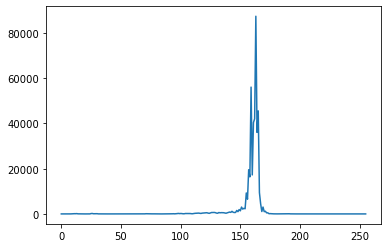

In [81]:
#Histogram calculation for one image (grayscale) - FINAL

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(image):
    (height,width) = image.shape
    hist = np.zeros(256)

    for i in range(width):
        for j in range(height):
            hist[image[j,i]] += 1
    return hist
            
image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl01.bmp", 0)
plt.plot(histogramCalc(image))


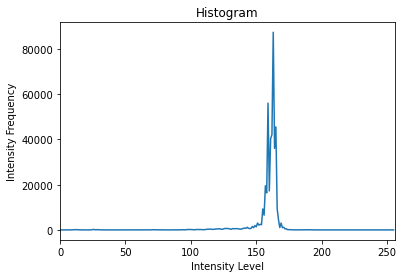

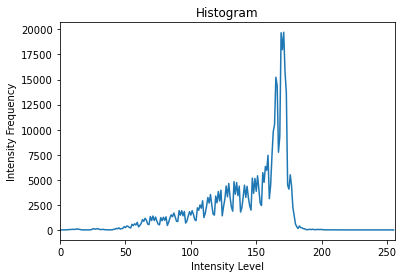

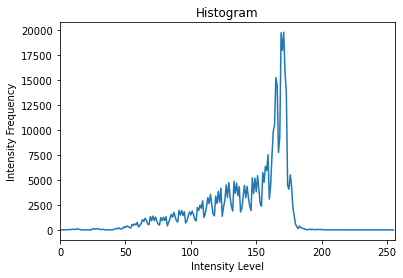

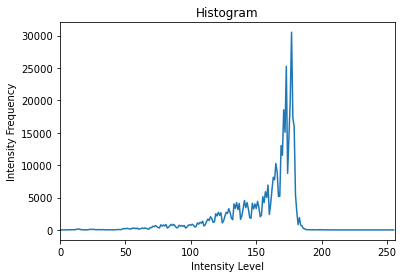

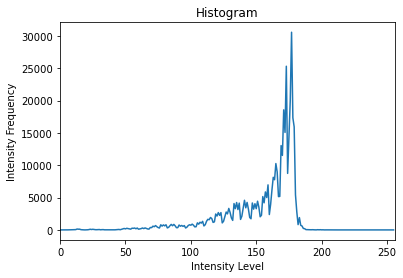

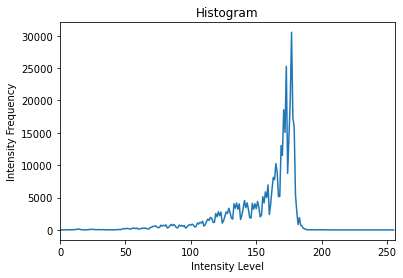

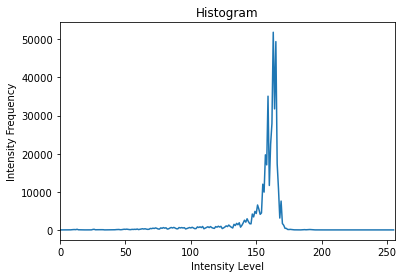

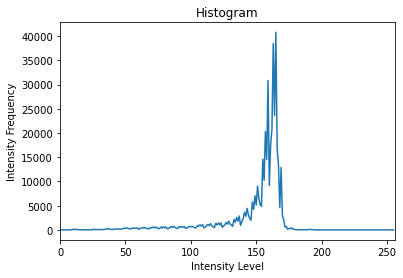

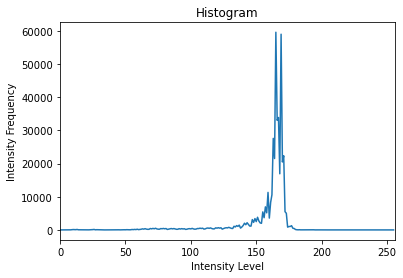

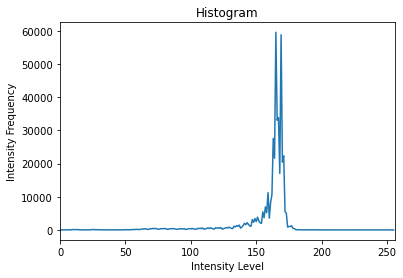

In [19]:
#Histogram calculation for multiple images (grayscale) - FINAL

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(histogramCalcArray):
    cntr = 1
    for eachImage in range(len(histogramCalcArray)):
        
        height,width = histogramCalcArray[eachImage].shape
        hist = np.zeros(256)

        for i in range(width):
            for j in range(height):
                hist[histogramCalcArray[eachImage][j,i]] += 1
        
        plottingHistograms(hist, cntr)
        cntr += 1
                
    return hist
        

def plottingHistograms(histogram, cntr):
    
    plt.figure()
    plt.title("Histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram)
    plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/GrayscaleHistogram" + str(cntr) + ".jpg")

histogramCalcArray = np.copy(grayscaleImages[:10])
histogram = histogramCalc(histogramCalcArray)


In [23]:
#averaging histograms for grayscale - FINAL

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(histogramCalcArray):
    cntr = 1
    averageHist = np.zeros(256)
    
    for eachImage in range(len(histogramCalcArray)):
        
        height,width = histogramCalcArray[eachImage].shape
        hist = np.zeros(256)

        for i in range(width):
            for j in range(height):
                hist[histogramCalcArray[eachImage][j,i]] += 1
        
        averageHist += hist
        
        plottingHistograms(hist, cntr, "no")
        cntr += 1
    
    averageHist = averageHist/len(histogramCalcArray)
    plottingHistograms(hist, cntr, "yes")

    return hist

def plottingHistograms(histogram, cntr, avg):
    
    figure = plt.figure()
    plt.title("Average Histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram)
    
    if (avg == "yes"):
        plt.title("average histogram")
        plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/AverageGrayscaleHistogram.jpg")
        
    else:
        plt.title("color histogram" + str(cntr))
        plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/GraysclaeHistogram" + str(cntr) + ".jpg")
    
    plt.close(figure)
    
histogramCalcArray = np.copy(grayscaleImages[:10])
histogram = histogramCalc(histogramCalcArray)


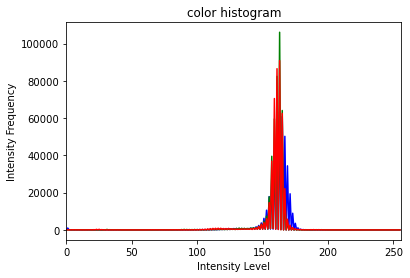

In [17]:
#Histogram calculation for one image (rgb) - (FINAL)

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(image):
    
    height, width, ch = image.shape
    hist = np.zeros([256, ch], np.int32)
    
    for i in range(0, height):
        for j in range(0, width):
            for k in range(0, ch):
                hist[image[i,j,k], k] += 1
    return hist

def plottingHistograms(histogram):
    
    plt.figure()
    plt.title("color histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram[:,0],'b')
    plt.plot(histogram[:,1],'g')
    plt.plot(histogram[:,2],'r')
    plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/Color_Histogram2.jpg")


image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl01.bmp")
#plt.plot(histogramCalc(image))
histogram = histogramCalc(image)
plottingHistograms(histogram)





In [61]:
#Histogram calculation for multiple images (rgb) - FINAL

import cv2
import random
from matplotlib import pyplot as plt

def histogramCalc(histogramCalcArray):
    cntr = 1
    for eachImage in range(len(histogramCalcArray)):
        height, width, ch = histogramCalcArray[eachImage].shape
        hist = np.zeros([256, ch], np.int32)
    
        for i in range(0, height):
            for j in range(0, width):
                for k in range(0, ch):
                    hist[histogramCalcArray[eachImage][i,j,k], k] += 1
        
        plottingHistograms(hist, cntr)
        cntr += 1

    return hist

def plottingHistograms(histogram, cntr):
    
    plt.figure()
    plt.title("color histogram")
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram[:,0],'b')
    plt.plot(histogram[:,1],'g')
    plt.plot(histogram[:,2],'r')
    plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/ColorHistogram" + str(cntr) + ".jpg")

histogramCalcArray = np.copy(originalImages[:10])
histogram = histogramCalc(histogramCalcArray)




In [20]:
#averaging histograms for rgb - FINAL

import cv2
import random
from matplotlib import pyplot as plt

#mypath = '/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/'
#columnarFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('cyl'))]
#parabasalFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('para'))]
#intermediateFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('inter'))]
#superFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('super'))]
#mildFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('let'))]
#moderateFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('mod'))]
#severeFiles = [f for f in listdir(mypath) if (isfile(join(mypath,f))) & (not f.startswith('.')) & (f.startswith('svar'))]

#originalImages = np.empty(len(cellFiles),dtype=object)

#for n in range(0,len(cellFiles)):
    #originalImages[n] = cv2.imread(join(mypath,cellFiles[n]))


def histogramCalc(histogramCalcArray):
    cntr = 1
    averageHist = np.zeros([256, 3], np.int32)
    
    for eachImage in range(len(histogramCalcArray)):
        height, width, ch = histogramCalcArray[eachImage].shape
        hist = np.zeros([256, ch], np.int32)
    
        for i in range(0, height):
            for j in range(0, width):
                for k in range(0, ch):
                    hist[histogramCalcArray[eachImage][i,j,k], k] += 1
        
        averageHist += hist
        
        plottingHistograms(hist, cntr, "no")
        cntr += 1
    
    averageHist = averageHist/len(histogramCalcArray)
    plottingHistograms(hist, cntr, "yes")

    return hist

def plottingHistograms(histogram, cntr, avg):
    
    figure=plt.figure()
    plt.xlabel("Intensity Level")
    plt.ylabel("Intensity Frequency")
    plt.xlim([0,256])
    plt.plot(histogram[:,0],'b')
    plt.plot(histogram[:,1],'g')
    plt.plot(histogram[:,2],'r')
    
    if (avg == "yes"):
        plt.title("average histogram")
        plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/AverageHistogram.jpg")
        
    else:
        plt.title("color histogram" + str(cntr))
        plt.savefig("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Histograms/ColorHistogram" + str(cntr) + ".jpg")
    
    plt.close(figure)
    
histogramCalcArray = np.copy(originalImages[:10])
histogram = histogramCalc(histogramCalcArray)


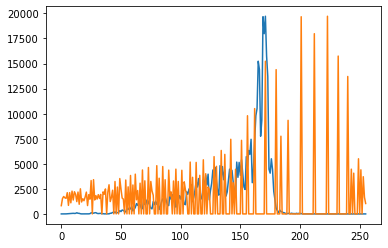

In [27]:
#Histogram equalization for grayscale - FINAL

import numpy as np
import cv2
from matplotlib import pyplot as plt

def histogramCalc(image):
    
    hist = np.zeros(shape=(256,1))
    
    height = image.shape[0]
    width = image.shape[1]
    
    for i in range(height):
        for j in range(width):
            k=image[i,j]
            hist[k,0]=hist[k,0]+1
    return hist

def equalizeHistogram(histogram, image):
    
    equal_image = np.copy(image)
    
    height = equal_image.shape[0]
    width = equal_image.shape[1]
    
    plt.plot(histogram)
    x = histogram.reshape(1,256)
    y = np.array([])
    y = np.append(y,x[0,0])
    for i in range(255):
        k = x[0,i+1]+y[i]
        y = np.append(y,k)
    y = np.round((y/(height*width))*255)
    
    for i in range(height):
        for j in range(width):
            k = equal_image[i,j]
            equal_image[i,j] = y[k]
    
    #cv2.imshow('new', equal_image)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    plt.plot(histogramCalc(equal_image))

image = cv2.imread("/Users/jasleenkaur/Desktop/Masters/Spring 2022/Image Analysis/Project/Cancerous cell smears/cyl02.bmp",0)
histogram = histogramCalc(image)
eHistogram = equalizeHistogram(histogram, image)
#plt.plot(histogram)

